In [1]:
import tensorflow as tf
from models import classifier
import pandas as pd
import pathlib
from hyperparameters import *
from constants import *
from utils import data_loading
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
apes_info = pd.read_csv(APES_INFO_FILEPATH)
all_images_ids, train_ids, validation_ids, test_ids = data_loading.get_image_ids(apes_info, pathlib.Path(DATA_FILEPATH))

In [3]:
dataset = data_loading.load_full_dataset(DATA_FILEPATH, IMAGE_SIZE, all_images_ids)

Found 10000 files belonging to 10000 classes.


In [4]:
x_train = data_loading.load_specific_dataset(dataset, train_ids, None)
x_validation = data_loading.load_specific_dataset(dataset, validation_ids, None)
x_test = data_loading.load_specific_dataset(dataset, test_ids, None)

In [5]:
_, _, _, feature_value_names = data_loading.get_feature_dataset_y(apes_info, FEATURE_NAMES)

In [6]:
train_dataset_mouth, validation_dataset_mouth, test_dataset_mouth = data_loading.prepare_feature_dataset(
    apes_info, "Mouth", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_background, validation_dataset_background, test_dataset_background = data_loading.prepare_feature_dataset(
    apes_info, "Background", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_hat, validation_dataset_hat, test_dataset_hat = data_loading.prepare_feature_dataset(
    apes_info, "Hat", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_eyes, validation_dataset_eyes, test_dataset_eyes = data_loading.prepare_feature_dataset(
    apes_info, "Eyes", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_clothes, validation_dataset_clothes, test_dataset_clothes = data_loading.prepare_feature_dataset(
    apes_info, "Clothes", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_fur, validation_dataset_fur, test_dataset_fur = data_loading.prepare_feature_dataset(
    apes_info, "Fur", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_earring, validation_dataset_earring, test_dataset_earring = data_loading.prepare_feature_dataset(
    apes_info, "Earring", x_train, x_validation, x_test, BATCH_SIZE
)

In [7]:
compile_classification_model_hyperparameters = {
    "optimizer": tf.keras.optimizers.legacy.Adam(),
    "loss": [tf.keras.losses.BinaryCrossentropy(from_logits=False)],
    "metrics": ["accuracy"],
}

In [8]:
mouth_classification_model = classifier.build_single_label_classifier(**MOUTH_CLASSIFICATION_MODEL_HYPERPARAMETERS)
mouth_classification_model.compile(**compile_classification_model_hyperparameters)
mouth_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_MOUTH_CLASSIFIER_FILEPATH, append=False)

In [9]:
mouth_classification_model.fit(
    train_dataset_mouth.repeat(STEPS_PER_EPOCH * 17),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=17,
    batch_size=None,
    validation_data=validation_dataset_mouth,
    callbacks=[mouth_csv_logger],
)
mouth_classification_model.save_weights(MODEL_MOUTH_CLASSIFIER_FILEPATH)

Epoch 1/17


2023-05-31 19:34:09.703569: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,33]
	 [[{{node Placeholder/_12}}]]
2023-05-31 19:34:09.703740: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,33]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.1014

2023-05-31 19:34:33.668233: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,33]
	 [[{{node Placeholder/_12}}]]
2023-05-31 19:34:33.668350: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,33]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - 38s 699ms/step - loss: 0.4789 - accuracy: 0.1014 - val_loss: 0.5195 - val_accuracy: 0.0127
Epoch 2/17
54/54 [==============================] - 36s 668ms/step - loss: 0.1911 - accuracy: 0.4556 - val_loss: 0.2992 - val_accuracy: 0.0667
Epoch 3/17
54/54 [==============================] - 37s 695ms/step - loss: 0.1026 - accuracy: 0.6711 - val_loss: 0.1876 - val_accuracy: 0.2740
Epoch 4/17
54/54 [==============================] - 38s 712ms/step - loss: 0.0709 - accuracy: 0.7714 - val_loss: 0.1404 - val_accuracy: 0.3527
Epoch 5/17
54/54 [==============================] - 39s 721ms/step - loss: 0.0545 - accuracy: 0.8177 - val_loss: 0.1055 - val_accuracy: 0.5453
Epoch 6/17
54/54 [==============================] - 34s 629ms/step - loss: 0.0445 - accuracy: 0.8385 - val_loss: 0.0773 - val_accuracy: 0.6007
Epoch 7/17
54/54 [==============================] - 33s 623ms/step - loss: 0.0376 - accuracy: 0.8485 - val_loss: 0.0577 - val_accuracy: 0.7413
Epoch 8/17

In [10]:
background_classification_model = classifier.build_single_label_classifier(
    **BACKGROUND_CLASSIFICATION_MODEL_HYPERPARAMETERS
)
background_classification_model.compile(**compile_classification_model_hyperparameters)
background_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_BACKGROUND_CLASSIFIER_FILEPATH, append=False)

In [11]:
background_classification_model.fit(
    train_dataset_background.repeat(STEPS_PER_EPOCH * 6),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=6,
    batch_size=None,
    validation_data=validation_dataset_background,
    callbacks=[background_csv_logger],
)
background_classification_model.save_weights(MODEL_BACKGROUND_CLASSIFIER_FILEPATH)

Epoch 1/6


2023-05-31 19:44:05.471742: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-05-31 19:44:05.471868: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,8]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - ETA: 0s - loss: 0.4177 - accuracy: 0.6201

2023-05-31 19:44:19.943065: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-05-31 19:44:19.943186: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,8]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - 28s 513ms/step - loss: 0.4177 - accuracy: 0.6201 - val_loss: 0.3744 - val_accuracy: 0.5007
Epoch 2/6
54/54 [==============================] - 28s 533ms/step - loss: 0.1619 - accuracy: 0.9464 - val_loss: 0.2709 - val_accuracy: 0.7560
Epoch 3/6
54/54 [==============================] - 28s 518ms/step - loss: 0.0990 - accuracy: 0.9780 - val_loss: 0.2093 - val_accuracy: 0.7560
Epoch 4/6
54/54 [==============================] - 31s 585ms/step - loss: 0.0692 - accuracy: 0.9849 - val_loss: 0.1133 - val_accuracy: 0.8780
Epoch 5/6
54/54 [==============================] - 31s 590ms/step - loss: 0.0546 - accuracy: 0.9859 - val_loss: 0.0406 - val_accuracy: 1.0000
Epoch 6/6
54/54 [==============================] - 31s 591ms/step - loss: 0.0446 - accuracy: 0.9876 - val_loss: 0.0244 - val_accuracy: 1.0000


In [12]:
hat_classification_model = classifier.build_single_label_classifier(**HAT_CLASSIFICATION_MODEL_HYPERPARAMETERS)
hat_classification_model.compile(**compile_classification_model_hyperparameters)
hat_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_HAT_CLASSIFIER_FILEPATH, append=False)

In [13]:
hat_classification_model.fit(
    train_dataset_hat.repeat(STEPS_PER_EPOCH * 15),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=15,
    batch_size=None,
    validation_data=validation_dataset_hat,
    callbacks=[hat_csv_logger],
)
hat_classification_model.save_weights(MODEL_HAT_CLASSIFIER_FILEPATH)

Epoch 1/15


2023-05-31 19:47:03.208399: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-05-31 19:47:03.208534: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,37]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - ETA: 0s - loss: 0.2579 - accuracy: 0.1416

2023-05-31 19:47:30.747455: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-05-31 19:47:30.747575: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,37]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - 41s 749ms/step - loss: 0.2579 - accuracy: 0.1416 - val_loss: 0.1418 - val_accuracy: 0.2147
Epoch 2/15
54/54 [==============================] - 42s 782ms/step - loss: 0.1005 - accuracy: 0.3316 - val_loss: 0.1402 - val_accuracy: 0.2147
Epoch 3/15
54/54 [==============================] - 42s 776ms/step - loss: 0.0767 - accuracy: 0.5506 - val_loss: 0.1590 - val_accuracy: 0.2147
Epoch 4/15
54/54 [==============================] - 42s 788ms/step - loss: 0.0538 - accuracy: 0.7509 - val_loss: 0.1528 - val_accuracy: 0.2147
Epoch 5/15
54/54 [==============================] - 43s 801ms/step - loss: 0.0403 - accuracy: 0.8555 - val_loss: 0.1136 - val_accuracy: 0.2967
Epoch 6/15
54/54 [==============================] - 40s 741ms/step - loss: 0.0322 - accuracy: 0.9117 - val_loss: 0.0620 - val_accuracy: 0.6180
Epoch 7/15
54/54 [==============================] - 39s 723ms/step - loss: 0.0267 - accuracy: 0.9322 - val_loss: 0.0309 - val_accuracy: 0.8833
Epoch 8/15

In [14]:
eyes_classification_model = classifier.build_single_label_classifier(**EYES_CLASSIFICATION_MODEL_HYPERPARAMETERS)
eyes_classification_model.compile(**compile_classification_model_hyperparameters)
eyes_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_EYES_CLASSIFIER_FILEPATH, append=False)

In [15]:
eyes_classification_model.fit(
    train_dataset_eyes.repeat(STEPS_PER_EPOCH * 10),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=10,
    batch_size=None,
    validation_data=validation_dataset_eyes,
    callbacks=[eyes_csv_logger],
)
eyes_classification_model.save_weights(MODEL_EYES_CLASSIFIER_FILEPATH)

Epoch 1/10


2023-05-31 19:57:14.817772: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-31 19:57:14.817903: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,23]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - ETA: 0s - loss: 0.2718 - accuracy: 0.4592

2023-05-31 19:57:31.575345: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-05-31 19:57:31.575631: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,23]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - 31s 565ms/step - loss: 0.2718 - accuracy: 0.4592 - val_loss: 0.2112 - val_accuracy: 0.3627
Epoch 2/10
54/54 [==============================] - 31s 580ms/step - loss: 0.0681 - accuracy: 0.8727 - val_loss: 0.1610 - val_accuracy: 0.2260
Epoch 3/10
54/54 [==============================] - 31s 573ms/step - loss: 0.0430 - accuracy: 0.9344 - val_loss: 0.1434 - val_accuracy: 0.3487
Epoch 4/10
54/54 [==============================] - 31s 582ms/step - loss: 0.0317 - accuracy: 0.9658 - val_loss: 0.1210 - val_accuracy: 0.4087
Epoch 5/10
54/54 [==============================] - 32s 604ms/step - loss: 0.0249 - accuracy: 0.9737 - val_loss: 0.0886 - val_accuracy: 0.5433
Epoch 6/10
54/54 [==============================] - 35s 655ms/step - loss: 0.0201 - accuracy: 0.9790 - val_loss: 0.0392 - val_accuracy: 0.9547
Epoch 7/10
54/54 [==============================] - 31s 589ms/step - loss: 0.0167 - accuracy: 0.9852 - val_loss: 0.0165 - val_accuracy: 0.9927
Epoch 8/10

In [16]:
clothes_classification_model = classifier.build_single_label_classifier(**CLOTHES_CLASSIFICATION_MODEL_HYPERPARAMETERS)
clothes_classification_model.compile(**compile_classification_model_hyperparameters)
clothes_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_CLOTHES_CLASSIFIER_FILEPATH, append=False)

In [17]:
clothes_classification_model.fit(
    train_dataset_clothes.repeat(STEPS_PER_EPOCH * 13),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=13,
    batch_size=None,
    validation_data=validation_dataset_clothes,
    callbacks=[clothes_csv_logger],
)
clothes_classification_model.save_weights(MODEL_CLOTHES_CLASSIFIER_FILEPATH)

Epoch 1/13


2023-05-31 20:02:22.636971: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-31 20:02:22.637106: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


54/54 [==============================] - ETA: 0s - loss: 0.1815 - accuracy: 0.3676

2023-05-31 20:02:42.247073: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,44]
	 [[{{node Placeholder/_12}}]]
2023-05-31 20:02:42.247190: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,44]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - 33s 605ms/step - loss: 0.1815 - accuracy: 0.3676 - val_loss: 0.1438 - val_accuracy: 0.2280
Epoch 2/13
54/54 [==============================] - 32s 592ms/step - loss: 0.0386 - accuracy: 0.8091 - val_loss: 0.1060 - val_accuracy: 0.1807
Epoch 3/13
54/54 [==============================] - 32s 600ms/step - loss: 0.0235 - accuracy: 0.9181 - val_loss: 0.0988 - val_accuracy: 0.1807
Epoch 4/13
54/54 [==============================] - 32s 607ms/step - loss: 0.0158 - accuracy: 0.9680 - val_loss: 0.0958 - val_accuracy: 0.2547
Epoch 5/13
54/54 [==============================] - 34s 636ms/step - loss: 0.0103 - accuracy: 0.9935 - val_loss: 0.0882 - val_accuracy: 0.2947
Epoch 6/13
54/54 [==============================] - 32s 596ms/step - loss: 0.0076 - accuracy: 0.9972 - val_loss: 0.0669 - val_accuracy: 0.5087
Epoch 7/13
54/54 [==============================] - 32s 607ms/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0339 - val_accuracy: 0.8660
Epoch 8/13

In [18]:
fur_classification_model = classifier.build_single_label_classifier(**FUR_CLASSIFICATION_MODEL_HYPERPARAMETERS)
fur_classification_model.compile(**compile_classification_model_hyperparameters)
fur_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_FUR_CLASSIFIER_FILEPATH, append=False)

In [19]:
fur_classification_model.fit(
    train_dataset_fur.repeat(STEPS_PER_EPOCH * 12),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=12,
    batch_size=None,
    validation_data=validation_dataset_fur,
    callbacks=[fur_csv_logger],
)
fur_classification_model.save_weights(MODEL_FUR_CLASSIFIER_FILEPATH)

Epoch 1/12


2023-05-31 20:09:11.232011: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,19]
	 [[{{node Placeholder/_12}}]]
2023-05-31 20:09:11.232144: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]


54/54 [==============================] - ETA: 0s - loss: 0.2940 - accuracy: 0.3646

2023-05-31 20:09:27.885113: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,19]
	 [[{{node Placeholder/_12}}]]
2023-05-31 20:09:27.885234: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,19]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - 30s 546ms/step - loss: 0.2940 - accuracy: 0.3646 - val_loss: 0.2594 - val_accuracy: 0.0600
Epoch 2/12
54/54 [==============================] - 30s 564ms/step - loss: 0.0807 - accuracy: 0.8351 - val_loss: 0.2276 - val_accuracy: 0.2687
Epoch 3/12
54/54 [==============================] - 29s 552ms/step - loss: 0.0498 - accuracy: 0.9176 - val_loss: 0.2230 - val_accuracy: 0.2573
Epoch 4/12
54/54 [==============================] - 30s 566ms/step - loss: 0.0345 - accuracy: 0.9590 - val_loss: 0.1811 - val_accuracy: 0.2920
Epoch 5/12
54/54 [==============================] - 33s 617ms/step - loss: 0.0254 - accuracy: 0.9692 - val_loss: 0.1260 - val_accuracy: 0.5973
Epoch 6/12
54/54 [==============================] - 32s 596ms/step - loss: 0.0204 - accuracy: 0.9773 - val_loss: 0.0856 - val_accuracy: 0.6953
Epoch 7/12
54/54 [==============================] - 35s 653ms/step - loss: 0.0164 - accuracy: 0.9850 - val_loss: 0.0176 - val_accuracy: 0.9780
Epoch 8/12

In [20]:
earring_classification_model = classifier.build_single_label_classifier(**EARRING_CLASSIFICATION_MODEL_HYPERPARAMETERS)
earring_classification_model.compile(**compile_classification_model_hyperparameters)
earring_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_EARRING_CLASSIFIER_FILEPATH, append=False)

In [21]:
earring_classification_model.fit(
    train_dataset_earring.repeat(STEPS_PER_EPOCH * 10),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=10,
    batch_size=None,
    validation_data=validation_dataset_earring,
    callbacks=[earring_csv_logger],
)
earring_classification_model.save_weights(MODEL_EARRING_CLASSIFIER_FILEPATH)

Epoch 1/10


2023-05-31 20:15:16.409770: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-31 20:15:16.409904: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,7]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - ETA: 0s - loss: 0.3316 - accuracy: 0.7436

2023-05-31 20:15:30.985765: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-31 20:15:30.986028: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,7]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - 28s 510ms/step - loss: 0.3316 - accuracy: 0.7436 - val_loss: 0.2557 - val_accuracy: 0.7147
Epoch 2/10
54/54 [==============================] - 29s 545ms/step - loss: 0.1025 - accuracy: 0.9147 - val_loss: 0.2058 - val_accuracy: 0.7147
Epoch 3/10
54/54 [==============================] - 29s 539ms/step - loss: 0.0567 - accuracy: 0.9715 - val_loss: 0.1889 - val_accuracy: 0.7147
Epoch 4/10
54/54 [==============================] - 29s 538ms/step - loss: 0.0391 - accuracy: 0.9766 - val_loss: 0.1312 - val_accuracy: 0.7633
Epoch 5/10
54/54 [==============================] - 30s 556ms/step - loss: 0.0297 - accuracy: 0.9852 - val_loss: 0.0893 - val_accuracy: 0.8147
Epoch 6/10
54/54 [==============================] - 29s 541ms/step - loss: 0.0239 - accuracy: 0.9916 - val_loss: 0.0322 - val_accuracy: 0.9913
Epoch 7/10
54/54 [==============================] - 25s 472ms/step - loss: 0.0188 - accuracy: 0.9940 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 8/10

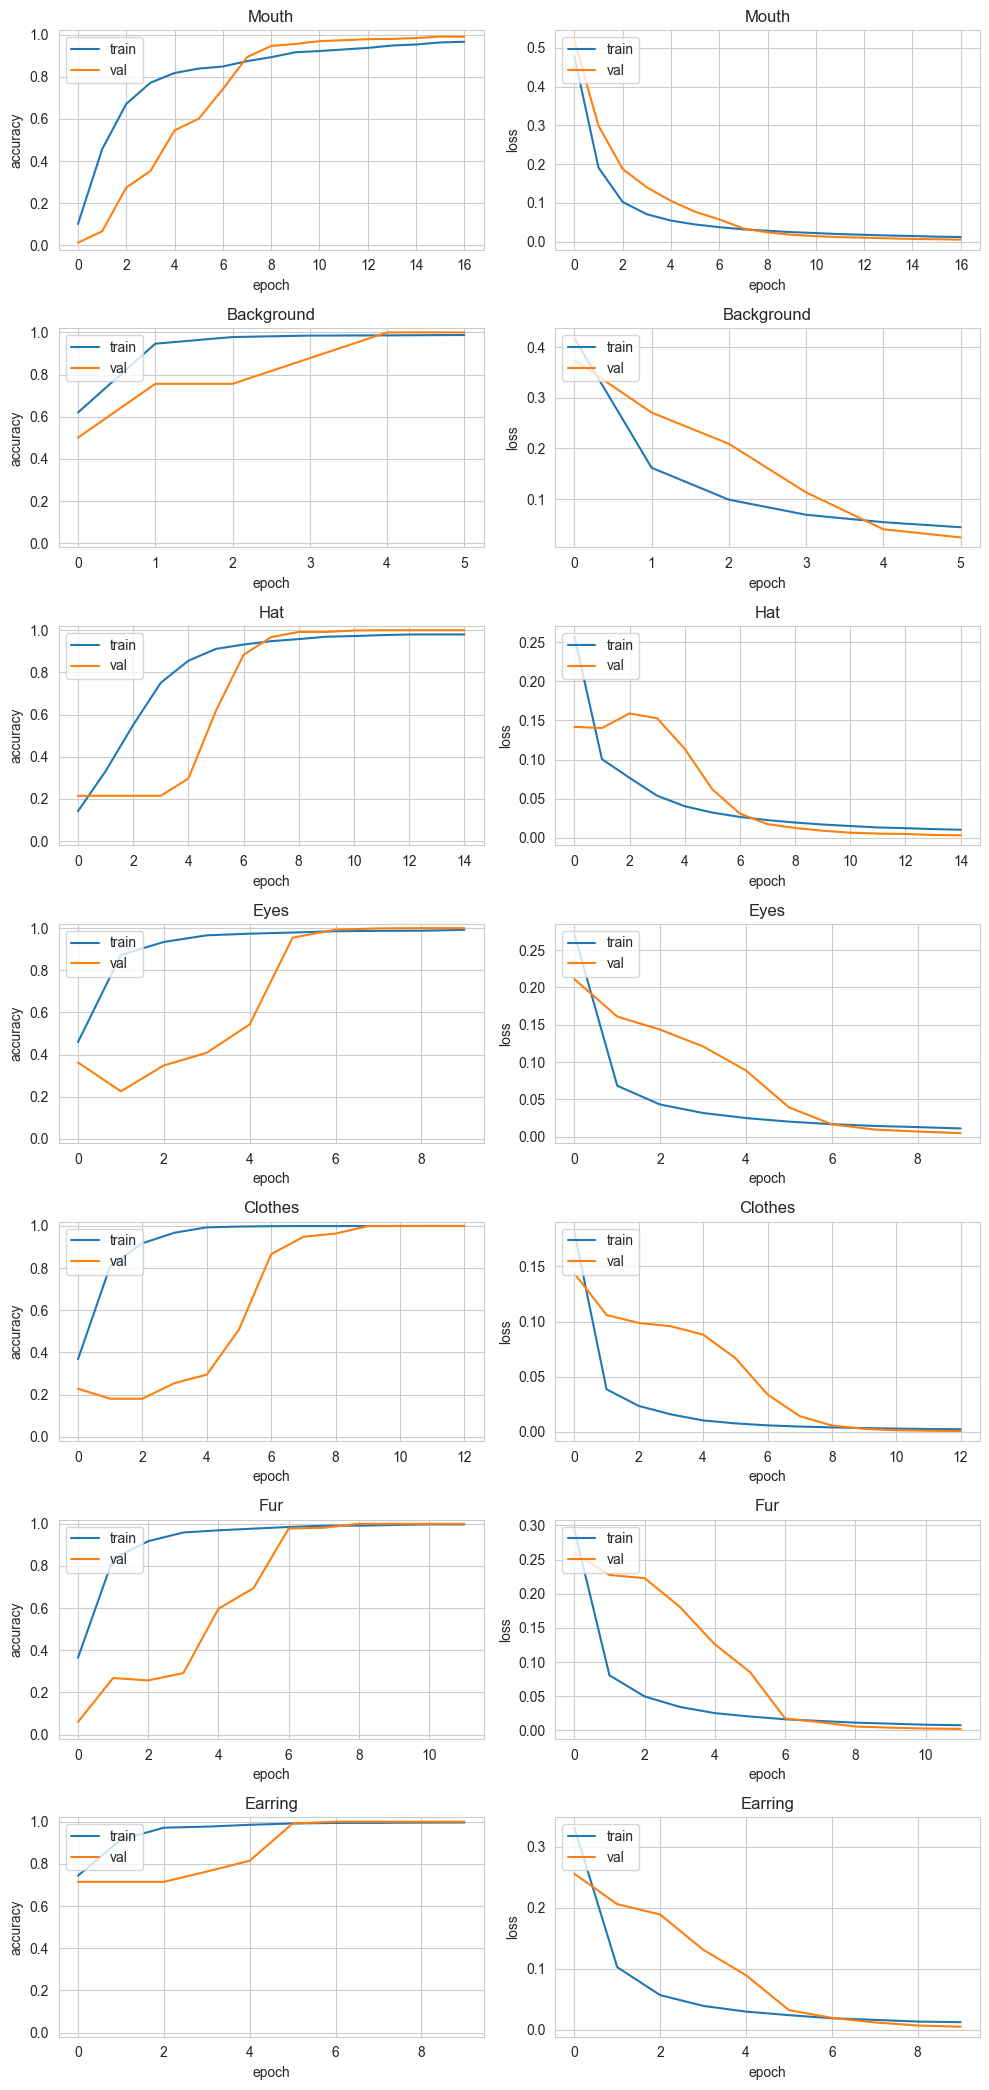

In [22]:
histories_classifiers_training = [
    pd.read_csv(HISTORY_MOUTH_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_BACKGROUND_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_HAT_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_EYES_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_CLOTHES_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_FUR_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_EARRING_CLASSIFIER_FILEPATH),
]

plt.figure(figsize=(10, len(FEATURE_NAMES) * 3))

for i, feature_name in enumerate(FEATURE_NAMES):
    plt.subplot(len(FEATURE_NAMES), 2, i * 2 + 1)
    plt.plot(histories_classifiers_training[i]["accuracy"])
    plt.plot(histories_classifiers_training[i][f"val_accuracy"])
    plt.title(feature_name)
    plt.ylim([-0.02, 1.02])
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "val"], loc="upper left")

    plt.subplot(len(FEATURE_NAMES), 2, i * 2 + 2)
    plt.plot(histories_classifiers_training[i]["loss"])
    plt.plot(histories_classifiers_training[i]["val_loss"])
    plt.title(feature_name)
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "val"], loc="upper left")

plt.tight_layout()
plt.show()

In [23]:
models = [
    mouth_classification_model,
    background_classification_model,
    hat_classification_model,
    eyes_classification_model,
    clothes_classification_model,
    fur_classification_model,
    earring_classification_model,
]

model_filepaths = [
    MODEL_MOUTH_CLASSIFIER_FILEPATH,
    MODEL_BACKGROUND_CLASSIFIER_FILEPATH,
    MODEL_HAT_CLASSIFIER_FILEPATH,
    MODEL_EYES_CLASSIFIER_FILEPATH,
    MODEL_CLOTHES_CLASSIFIER_FILEPATH,
    MODEL_FUR_CLASSIFIER_FILEPATH,
    MODEL_EARRING_CLASSIFIER_FILEPATH,
]
test_datasets = [
    test_dataset_mouth,
    test_dataset_background,
    test_dataset_hat,
    test_dataset_eyes,
    test_dataset_clothes,
    test_dataset_fur,
    test_dataset_earring,
]

In [24]:
def make_predictions(model, model_filepath, test_dataset):
    model.load_weights(model_filepath)

    return (
        model.predict(test_dataset.unbatch().batch(1)),
        list(test_dataset.unbatch().batch(1).map(lambda x, y: y)),
    )


y_test_predictions = []
y_test_true = []

for mod, mod_fp, t_ds in zip(models, model_filepaths, test_datasets):
    y_predictions, y_true = make_predictions(mod, mod_fp, t_ds)
    y_test_predictions.append(y_predictions)
    y_test_true.append(y_true)

2023-05-31 20:19:52.046255: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-31 20:19:52.046389: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]


1500/1500 [==============================] - 14s 9ms/step


2023-05-31 20:20:06.706792: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-05-31 20:20:06.706921: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,33]
	 [[{{node Placeholder/_12}}]]
2023-05-31 20:20:19.769035: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1

1500/1500 [==============================] - 13s 8ms/step


2023-05-31 20:20:32.994010: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,8]
	 [[{{node Placeholder/_12}}]]
2023-05-31 20:20:32.994136: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,8]
	 [[{{node Placeholder/_12}}]]
2023-05-31 20:20:46.823976: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1

1500/1500 [==============================] - 15s 9ms/step


2023-05-31 20:21:02.054546: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,37]
	 [[{{node Placeholder/_12}}]]
2023-05-31 20:21:02.054680: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-05-31 20:21:14.957101: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1

1500/1500 [==============================] - 14s 8ms/step


2023-05-31 20:21:28.694925: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-05-31 20:21:28.695055: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,23]
	 [[{{node Placeholder/_12}}]]
2023-05-31 20:21:41.780901: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [

1500/1500 [==============================] - 14s 9ms/step


2023-05-31 20:21:56.083843: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-31 20:21:56.083970: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-31 20:22:09.223740: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [150

1500/1500 [==============================] - 14s 8ms/step


2023-05-31 20:22:23.008249: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-05-31 20:22:23.008376: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,19]
	 [[{{node Placeholder/_12}}]]
2023-05-31 20:22:36.051587: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [

1500/1500 [==============================] - 14s 8ms/step


2023-05-31 20:22:49.829418: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-31 20:22:49.829547: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


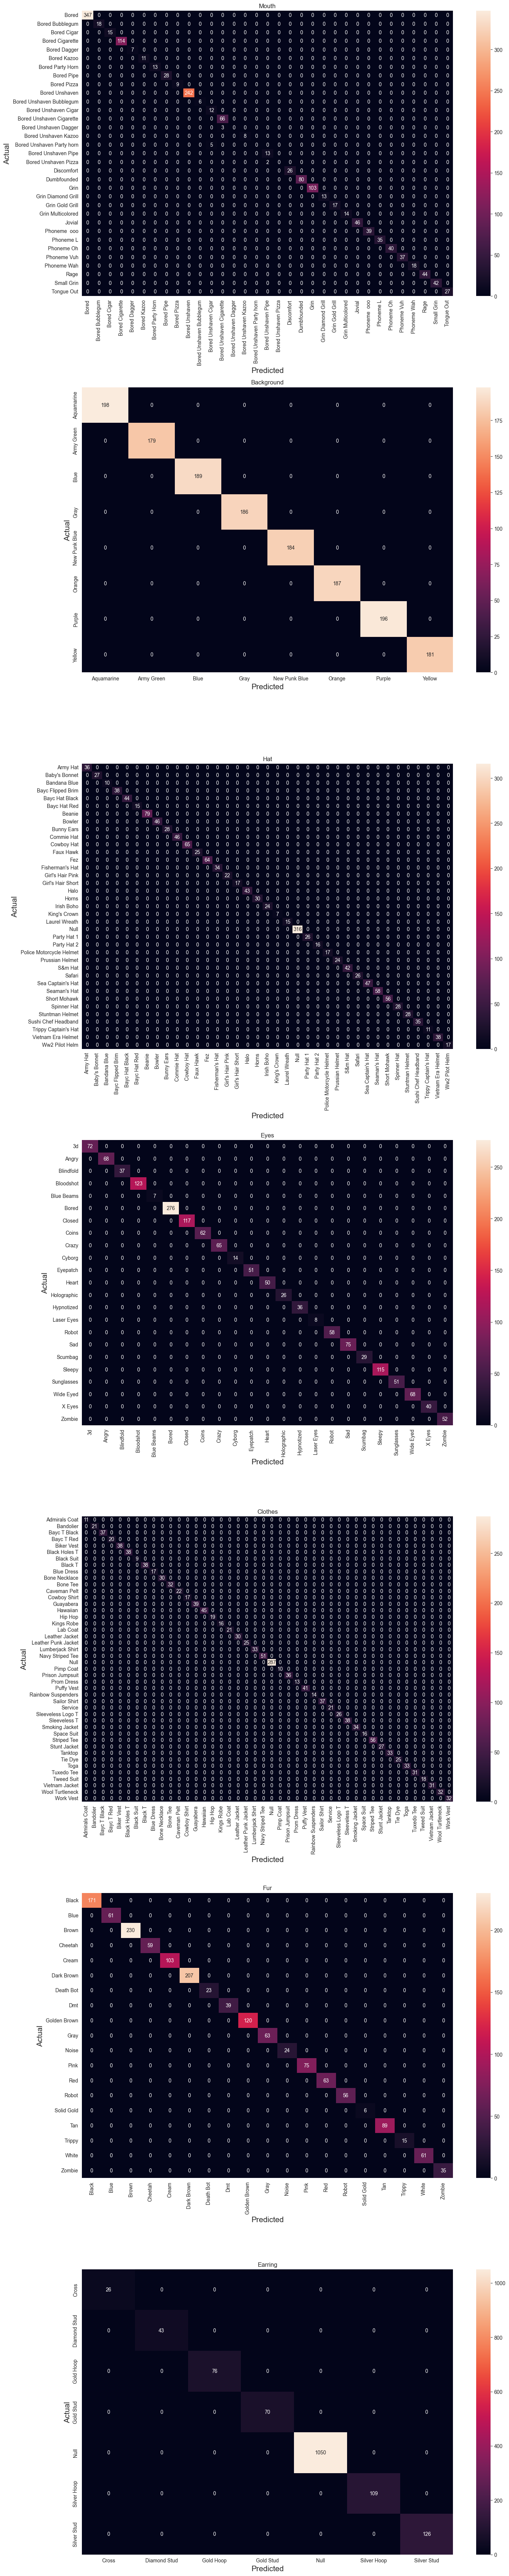

In [25]:
plt.figure(figsize=(15, len(FEATURE_NAMES) * 10))

for i, feature_name in enumerate(FEATURE_NAMES):
    cfm = confusion_matrix([np.argmax(x) for x in y_test_true[i]], [np.argmax(x) for x in y_test_predictions[i]])
    df_cfm = pd.DataFrame(cfm, index=feature_value_names[feature_name], columns=feature_value_names[feature_name])

    plt.subplot(len(FEATURE_NAMES), 1, i + 1)
    sns.heatmap(df_cfm, annot=True, fmt=".0f")
    plt.title(feature_name)
    plt.xlabel("Predicted", fontsize=15)
    plt.ylabel("Actual", fontsize=15)

plt.tight_layout()
plt.show()